# **Classifier Test Framework: Supervised Learning for Perk Assignment**

## Executive Summary: Classifier Test for Perk Assignment

This notebook evaluates supervised learning models to predict the **best perk assignment** for TravelTide users.

###  Key Business Questions
- Can machine learning improve perk assignment accuracy compared to rule-based methods?  
- Which model (SVM vs Random Forest) provides **better predictive performance**?  
- What features most influence perk assignment decisions?  

###  Approach
- Data is preprocessed with imputation, scaling, and encoding.  
- Two models are trained: **Support Vector Machine (SVM)** and **Random Forest**.  
- Models are evaluated using accuracy, precision, recall, F1-score, ROC AUC, and cross-validation.  
- Confusion matrices and feature importance plots provide interpretability.  
- Results are compiled into a **comprehensive report** with metrics and visualizations.  

###  Expected Insights
- Clear comparison of **SVM vs Random Forest performance**.  
- Identification of **key features driving perk predictions**.  
- Actionable guidance for **deploying supervised learning in perk assignment workflows**.  




In [8]:
import os
import sys
# --- Setup ---
%load_ext autoreload
%autoreload 2
%matplotlib inline

bad_paths = [
    "/Users/guykaptue/my_work_spaces/machine learning",
    "/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src"
]
sys.path = [p for p in sys.path if os.path.abspath(p) not in bad_paths]

print("Clean sys.path:")
for p in sys.path:
    print(" -", p)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Clean sys.path:
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
 - /opt/anaconda3/envs/ml311/lib/python311.zip
 - /opt/anaconda3/envs/ml311/lib/python3.11
 - /opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload
 - 
 - /opt/anaconda3/envs/ml311/lib/python3.11/site-packages
 - __editable__.tts_mastery_project-0.1.0.finder.__path_hook__


In [9]:
import pandas as pd  # noqa: F401
import numpy as np  # noqa: F401
from IPython.display import display

# ------------------------------------------------------------
# 1️⃣ Determine project root dynamically
# - Works even if notebook is in a subfolder of notebooks/
# ------------------------------------------------------------
cwd = os.getcwd()
print("Current working directory:", cwd)

# Project root = traveltide_project folder
# Assumes notebooks/ is directly under traveltide_project/
# Project root
project_root = os.path.abspath(os.path.join(cwd, "../.."))
print("Project root:", project_root)



## ------------------------------------------------------------
# 2️⃣ Add project root to sys.path for imports
# ------------------------------------------------------------
# Add project root to sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)



print("Project root added to sys.path:", project_root)

print(sys.path)  # Ensure /traveltide_project is included

# Check if src exists
print(os.path.exists(os.path.join(project_root, "src")))



Current working directory: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/notebooks/tests
Project root: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
Project root added to sys.path: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project
['/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project', '/opt/anaconda3/envs/ml311/lib/python311.zip', '/opt/anaconda3/envs/ml311/lib/python3.11', '/opt/anaconda3/envs/ml311/lib/python3.11/lib-dynload', '', '/opt/anaconda3/envs/ml311/lib/python3.11/site-packages', '__editable__.tts_mastery_project-0.1.0.finder.__path_hook__']
True


In [10]:
# Verify that src is importable
try:
    import src
    print("✅ src module found at:", src.__file__)
except ModuleNotFoundError:
    print("❌ src module not found. Check your sys.path!")
    


✅ src module found at: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/src/__init__.py


In [11]:
from src.core import (
    DataLoader, # noqa: F401 
    ClassificationModelTest
)


  

In [12]:
loader = DataLoader()
kmeans_segmentation=loader.load_table(data_type='kmeans', table_name='kmeans_segmentation')
customer_segmentation=loader.load_table(data_type='non_ml', table_name='customer_segmentation_detailed')


✅ Verbindung zur PostgreSQL-Datenbank hergestellt.
📁 Lade Tabelle 'kmeans_segmentation' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/ml_model/kmeans/kmeans_segmentation.csv
✅ CSV geladen. Zeilen: 5998
📁 Lade Tabelle 'customer_segmentation_detailed' aus CSV: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/non_ml/customer_segmentation_detailed.csv
✅ CSV geladen. Zeilen: 5998


In [13]:
manual_classifier = ClassificationModelTest(
    data= customer_segmentation
)

   ✅ Removed unwanted columns: ['cluster', 'segment_name', 'persona_type', 'home_city', 'assigned_group']
✅ ClassificationModelTest initialized
   Data shape: (5998, 54)
   Target column: assigned_perk



🚀 Running complete supervised learning analysis...

[STEP 1] Preprocessing data...
   ✅ Data preprocessed
      Train shape: (4198, 53)
      Test shape: (1800, 53)
   ✅ Data preprocessing finished
   Train shape: (4198, 53), Test shape: (1800, 53)

[STEP 2] Training models (SVM & Random Forest)...
   ✅ Models trained
   ✅ Model training completed
   Models available: ['svm', 'random_forest']

[STEP 3] Evaluating models...
   ✅ Svm evaluated
      Accuracy: 0.942
      Precision: 0.944
      Recall: 0.942
      F1: 0.943
      CV Accuracy: 0.934 ± 0.017
   ✅ Random_forest evaluated
      Accuracy: 0.999
      Precision: 0.999
      Recall: 0.999
      F1: 0.999
      ROC AUC: 1.000
      CV Accuracy: 0.999 ± 0.001
   ✅ Model evaluation completed
   Svm -> Accuracy: 0.942, F1: 0.943, CV Mean: 0.934
   Random_forest -> Accuracy: 0.999, F1: 0.999, CV Mean: 0.999

[STEP 4] Generating visualizations...


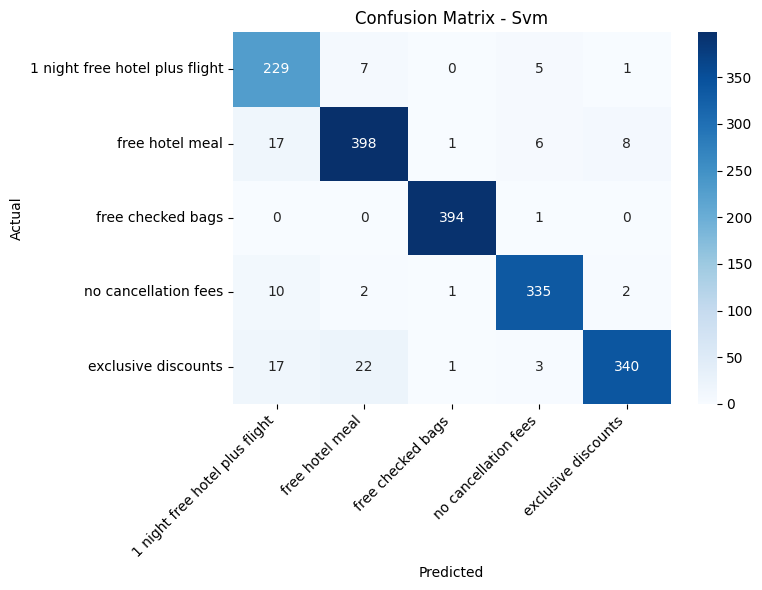

   ✅ Saved confusion matrix for svm: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/confusion_matrix_svm.png


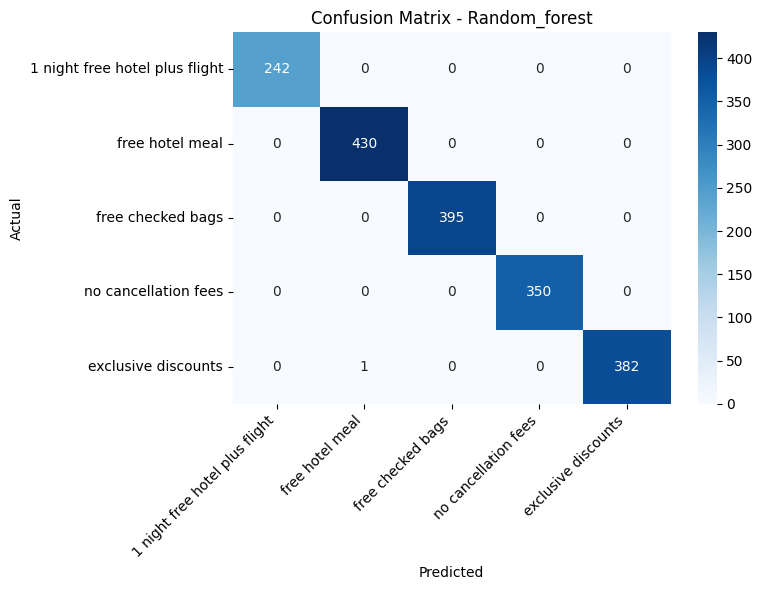

   ✅ Saved confusion matrix for random_forest: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/confusion_matrix_random_forest.png


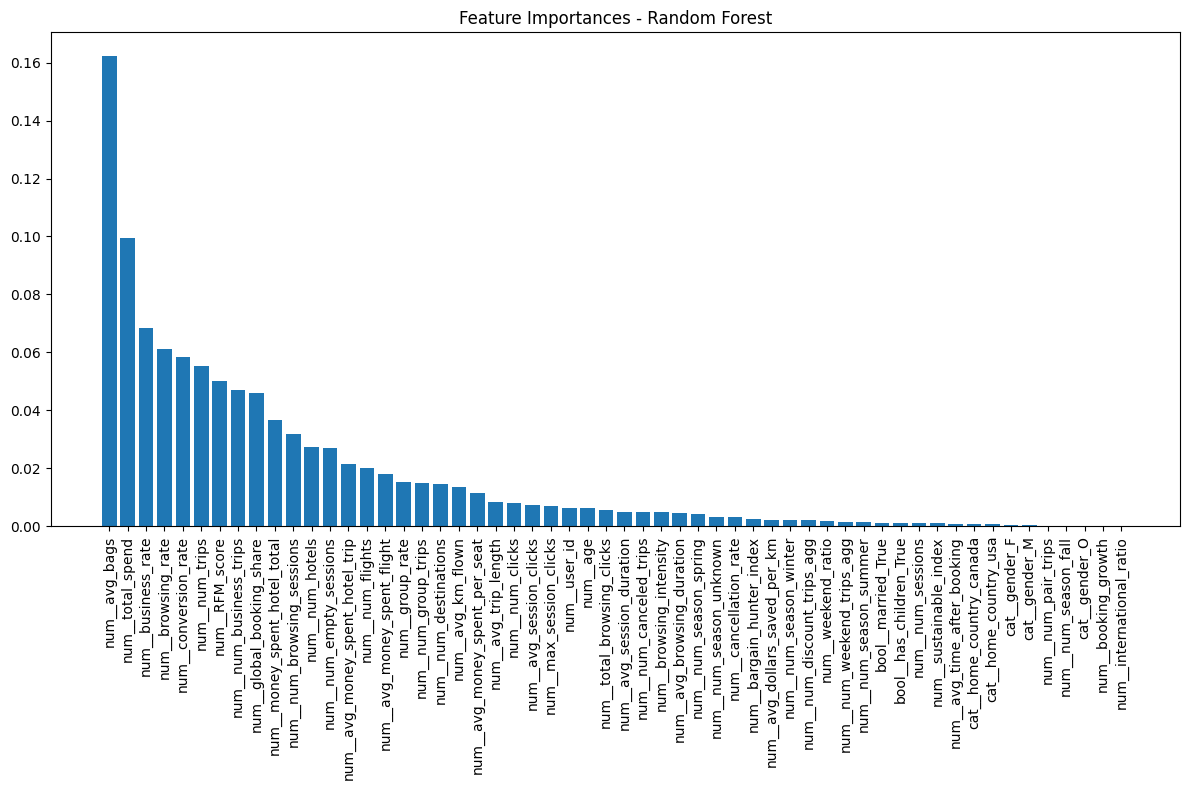

   ✅ Saved feature importances: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/feature_importances.png
   ✅ Visualizations saved
   Files: ['/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/confusion_matrix_svm.png', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/confusion_matrix_random_forest.png', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/feature_importances.png']

[STEP 5] Compiling report...
   ✅ Saved classification report: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/classifier/classification_report.json
   ✅ Report generated
   Report keys: ['metadata', 'metrics', 'visualizations']

[STEP 6] Exporting results to CSV...
   ✅ Saved test results with predictions: /Users/guyka

{'metadata': {'test_date': '2025-12-01 09:50:21',
  'data_shape': (5998, 54),
  'train_shape': (4198, 53),
  'test_shape': (1800, 53),
  'target_column': 'assigned_perk',
  'random_state': 42},
 'metrics': {'svm': {'accuracy': 0.9422222222222222,
   'precision': 0.9444090779285295,
   'recall': 0.9422222222222222,
   'f1': 0.9425037790121465,
   'roc_auc': None,
   'cv_mean': np.float64(0.9340155513933821),
   'cv_std': np.float64(0.017148667498101733),
   'confusion_matrix': array([[229,   7,   0,   5,   1],
          [ 17, 398,   1,   6,   8],
          [  0,   0, 394,   1,   0],
          [ 10,   2,   1, 335,   2],
          [ 17,  22,   1,   3, 340]]),
   'classification_report': {'1 night free hotel plus flight': {'precision': 0.8388278388278388,
     'recall': 0.9462809917355371,
     'f1-score': 0.8893203883495145,
     'support': 242.0},
    'exclusive discounts': {'precision': 0.9277389277389277,
     'recall': 0.9255813953488372,
     'f1-score': 0.9266589057043073,
     'sup

In [14]:
manual_classifier.run_complete_analysis()

In [15]:
ml_classifier = ClassificationModelTest(
    data=kmeans_segmentation
)

   ✅ Removed unwanted columns: ['cluster', 'segment_name', 'persona_type', 'home_city', 'assigned_group']
✅ ClassificationModelTest initialized
   Data shape: (5998, 60)
   Target column: assigned_perk



🚀 Running complete supervised learning analysis...

[STEP 1] Preprocessing data...
   ✅ Data preprocessed
      Train shape: (4198, 59)
      Test shape: (1800, 59)
   ✅ Data preprocessing finished
   Train shape: (4198, 59), Test shape: (1800, 59)

[STEP 2] Training models (SVM & Random Forest)...
   ✅ Models trained
   ✅ Model training completed
   Models available: ['svm', 'random_forest']

[STEP 3] Evaluating models...
   ✅ Svm evaluated
      Accuracy: 0.838
      Precision: 0.841
      Recall: 0.838
      F1: 0.837
      CV Accuracy: 0.818 ± 0.023
   ✅ Random_forest evaluated
      Accuracy: 0.897
      Precision: 0.898
      Recall: 0.897
      F1: 0.897
      ROC AUC: 0.991
      CV Accuracy: 0.897 ± 0.011
   ✅ Model evaluation completed
   Svm -> Accuracy: 0.838, F1: 0.837, CV Mean: 0.818
   Random_forest -> Accuracy: 0.897, F1: 0.897, CV Mean: 0.897

[STEP 4] Generating visualizations...


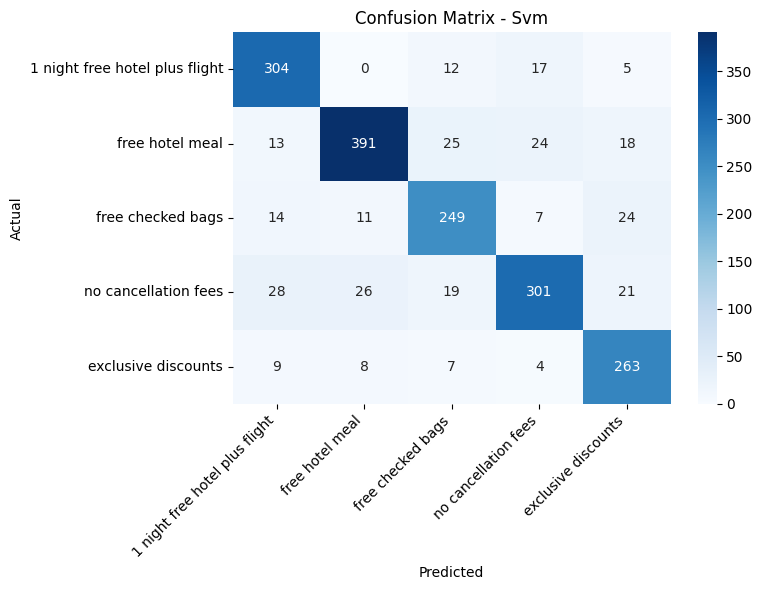

   ✅ Saved confusion matrix for svm: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/confusion_matrix_svm.png


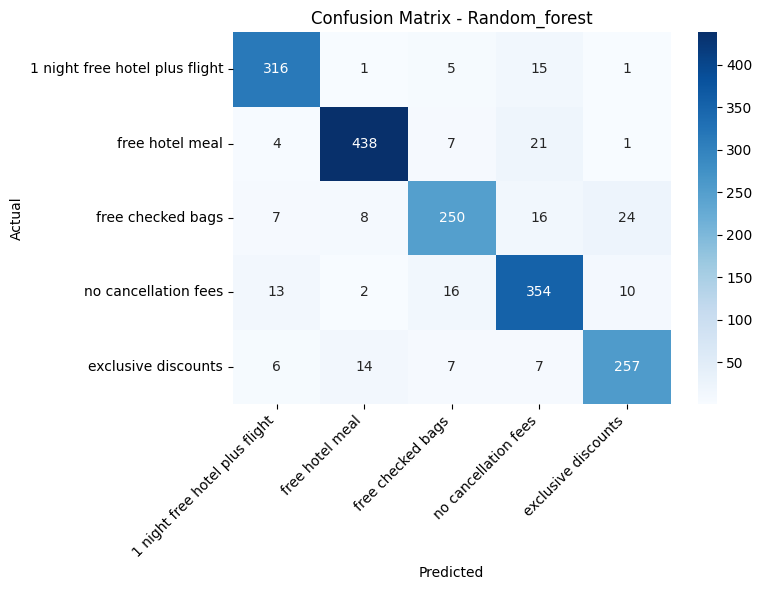

   ✅ Saved confusion matrix for random_forest: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/confusion_matrix_random_forest.png


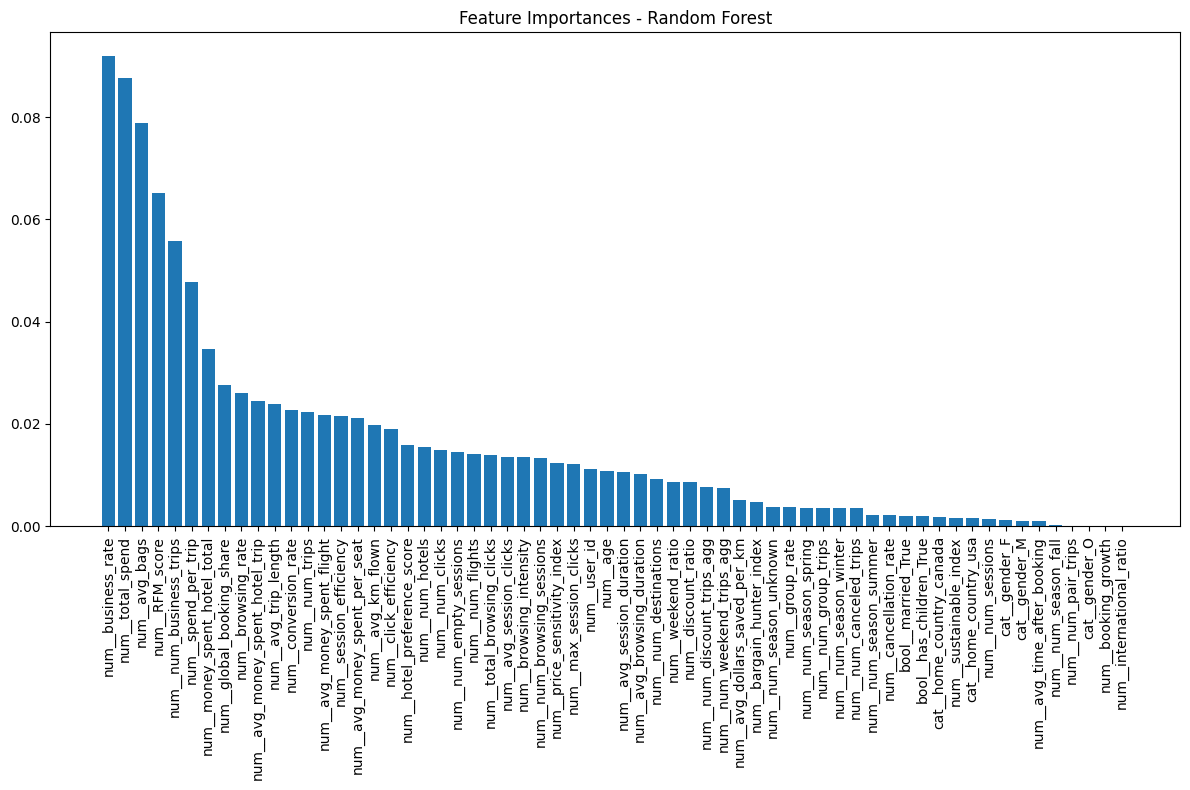

   ✅ Saved feature importances: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/feature_importances.png
   ✅ Visualizations saved
   Files: ['/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/confusion_matrix_svm.png', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/confusion_matrix_random_forest.png', '/Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/reports/segment/classifier/feature_importances.png']

[STEP 5] Compiling report...
   ✅ Saved classification report: /Users/guykaptue/my_work_spaces/machine learning/masterschool/traveltide_project/data/csv/processed/segment/classifier/classification_report.json
   ✅ Report generated
   Report keys: ['metadata', 'metrics', 'visualizations']

[STEP 6] Exporting results to CSV...
   ✅ Saved test results with predictions: /Users/guyka

{'metadata': {'test_date': '2025-12-01 09:50:29',
  'data_shape': (5998, 60),
  'train_shape': (4198, 59),
  'test_shape': (1800, 59),
  'target_column': 'assigned_perk',
  'random_state': 42},
 'metrics': {'svm': {'accuracy': 0.8377777777777777,
   'precision': 0.8405827896343288,
   'recall': 0.8377777777777777,
   'f1': 0.8374073792215054,
   'roc_auc': None,
   'cv_mean': np.float64(0.8177765480447243),
   'cv_std': np.float64(0.023394576440744226),
   'confusion_matrix': array([[304,   0,  12,  17,   5],
          [ 13, 391,  25,  24,  18],
          [ 14,  11, 249,   7,  24],
          [ 28,  26,  19, 301,  21],
          [  9,   8,   7,   4, 263]]),
   'classification_report': {'1 night free hotel plus flight': {'precision': 0.8260869565217391,
     'recall': 0.8994082840236687,
     'f1-score': 0.8611898016997167,
     'support': 338.0},
    'exclusive discounts': {'precision': 0.8967889908256881,
     'recall': 0.8301486199575372,
     'f1-score': 0.8621830209481808,
     'sup

In [16]:
ml_classifier.run_complete_analysis()